In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\beer.csv')

In [3]:
df.head()

,Unnamed: 0,name,calories,sodium,alcohol,cost
0,0,Budweiser,144,15,4.7,0.43
1,1,Schlitz,151,19,4.9,0.43
2,2,Lowenbrau,157,15,0.9,0.48
3,3,Kronenbourg,170,7,5.2,0.73
4,4,Heineken,152,11,5.0,0.77


In [4]:
#elimino colonna 0

df.drop(df.iloc[:,0:1],axis=1,inplace=True)

In [5]:
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [6]:
#considero solo calories,sodium,alcohol,cost

x=df.drop(df.iloc[:,0:1],axis=1)

In [7]:
#imposto 3 clusters

from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=1)

In [8]:
km.fit(x)

KMeans(n_clusters=3, random_state=1)

In [9]:
# creo colonna con clusters

df['clusters']=km.labels_

In [10]:
#raggruppo per clusters

df.groupby('clusters').mean()

,calories,sodium,alcohol,cost
clusters,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [11]:
#media dei clusters (come centri)

centers=df.groupby('clusters').mean()

In [12]:
import numpy as np

In [13]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [14]:
colors=np.array(['red','blue','green'])

fig=go.Figure()
fig.add_trace(go.Scatter(x=df.calories,y=df.alcohol,mode='markers',name='clusters',
                        marker_color=colors[list(df.clusters)]))
fig.add_trace(go.Scatter(x=centers.calories,y=centers.alcohol,mode='markers',name='centers',
                        marker_color='gold',marker_size=10))
fig.update_traces(marker=dict(size=8,
                              line=dict(width=1,
                                        color='black')))
fig.update_layout(title='clusters of beer',
                 xaxis_title='calories',
                 yaxis_title='alcohol')
fig.show()

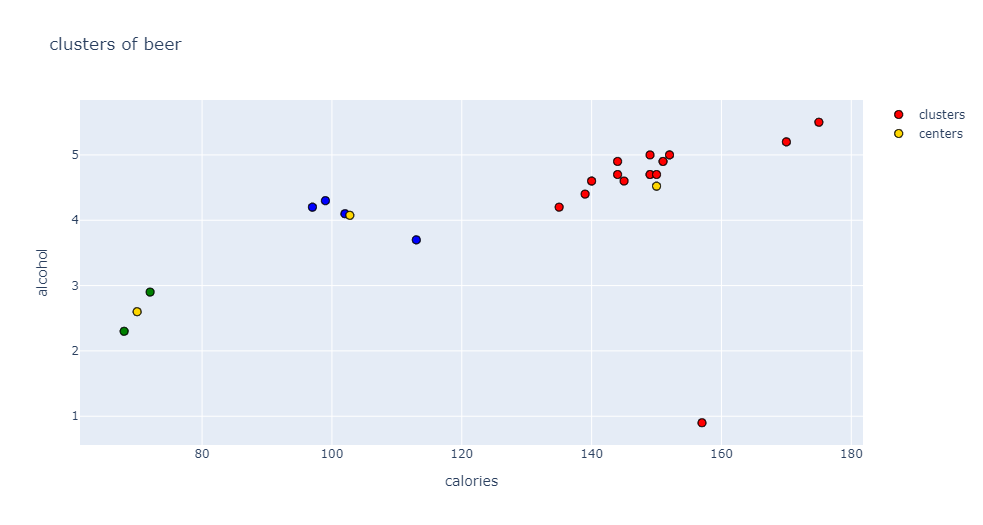

### Metrica per valutare clusters

In [15]:
#ne ho impostati 3 di default. Qual'è il numero ottimale?
#coeff di silhouette

In [16]:
from sklearn import metrics

In [17]:
metrics.silhouette_score(x,km.labels_)

0.6731775046455796

In [18]:
#valori coeff silhouette vanno da -1(pessimo) a 1(ottimo)
#0.67 è migliorabile. cerco valore ottimale

In [19]:
#creo un KMeans su x scalato

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_sc=scaler.fit_transform(x)

In [20]:
score=[]
a=[]
for k in range(2,20):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(x_sc)
    score.append(metrics.silhouette_score(x_sc,km.labels_))
    a.append(k)

In [21]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=a,y=score))
fig.update_layout(xaxis_title='clusters',
                 yaxis_title='coeff silhouette')
fig.show()

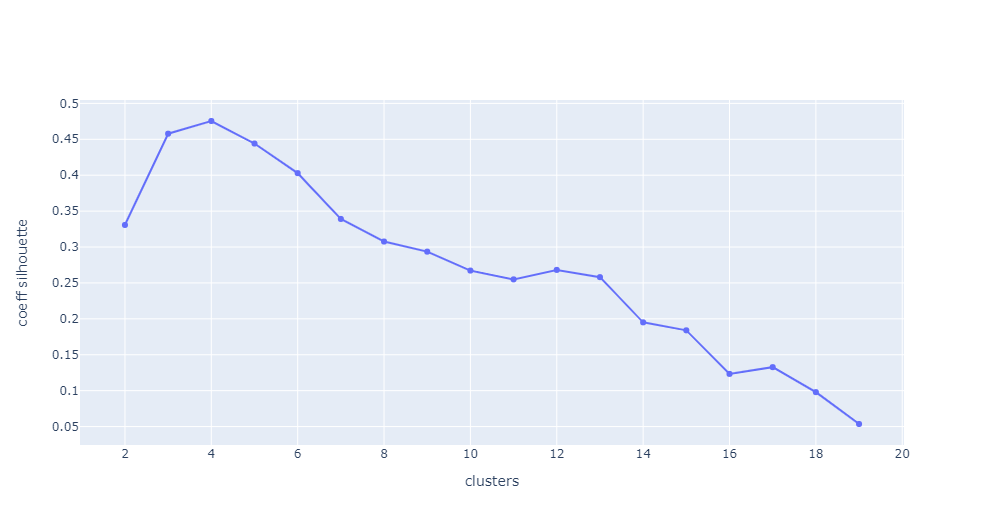

In [22]:
#4 è il numero ottimale di clusters (valore maggiore del coeff su x scalato)

In [23]:
km=KMeans(n_clusters=4,random_state=1)
km.fit(x)

df['clusters']=km.labels_
centers=df.groupby('clusters').mean()

colors=np.array(['red','blue','green','violet'])

fig=go.Figure()
fig.add_trace(go.Scatter(x=df.calories,y=df.alcohol,mode='markers',name='clusters',
                        marker_color=colors[list(df.clusters)]))
fig.add_trace(go.Scatter(x=centers.calories,y=centers.alcohol,mode='markers',name='centers',
                        marker_color='gold',marker_size=10))
fig.update_traces(marker=dict(size=8,
                              line=dict(width=1,
                                        color='black')))
fig.update_layout(title='clusters of beer',
                 xaxis_title='calories',
                 yaxis_title='alcohol')
fig.show()

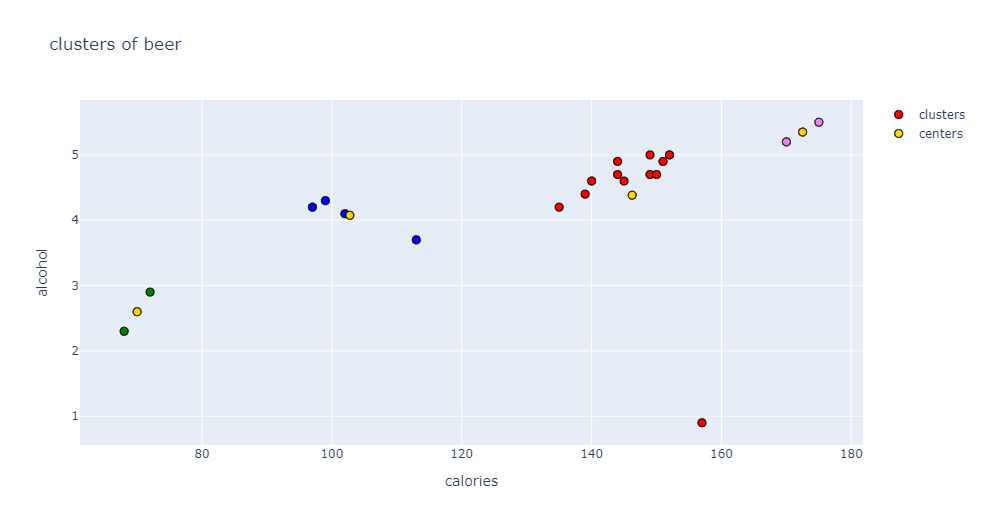